<Figure size 1200x600 with 0 Axes>

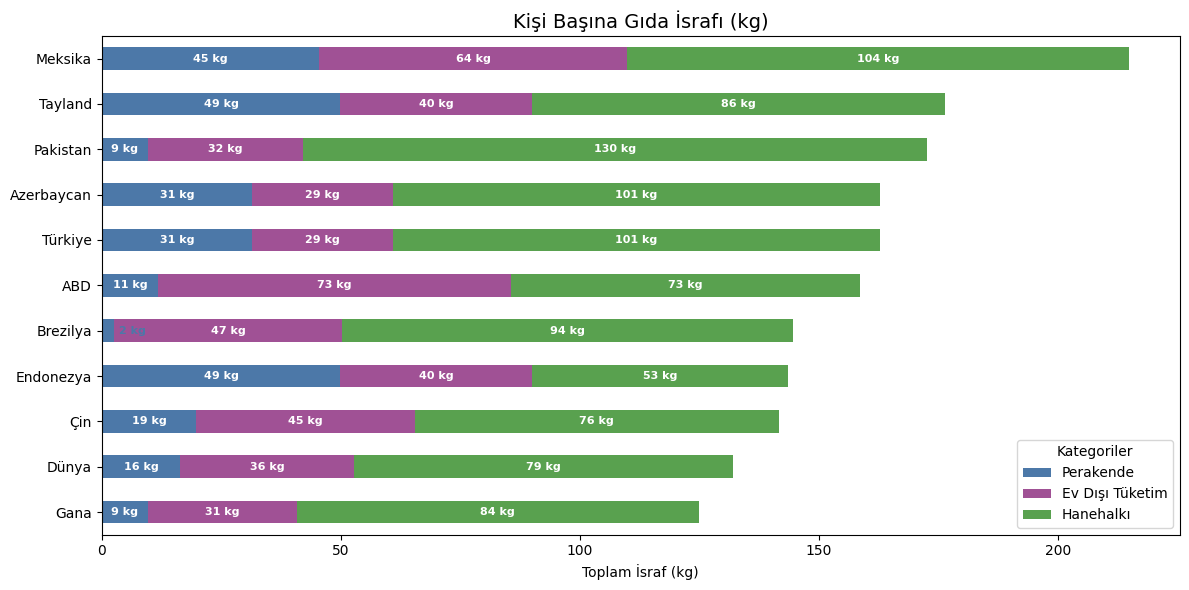

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("food-waste-per-capita.csv")
df.columns = df.columns.str.strip()

df = df.rename(columns={
    'Entity': 'Ülke',
    '12.3.1 - Food waste per capita (KG) - AG_FOOD_WST_PC - Retail': 'Perakende',
    '12.3.1 - Food waste per capita (KG) - AG_FOOD_WST_PC - Out-of-home consumption': 'Ev Dışı Tüketim',
    '12.3.1 - Food waste per capita (KG) - AG_FOOD_WST_PC - Households': 'Hanehalkı'
})

ulke_ceviri = {
    "Mexico": "Meksika",
    "Thailand": "Tayland",
    "Pakistan": "Pakistan",
    "Azerbaijan": "Azerbaycan",
    "Turkey": "Türkiye",
    "United States": "ABD",
    "Brazil": "Brezilya",
    "Indonesia": "Endonezya",
    "China": "Çin",
    "World": "Dünya",
    "Ghana": "Gana"
}
df["Ülke"] = df["Ülke"].replace(ulke_ceviri)

df = df[df["Year"] == 2022]

df = df[["Ülke", "Perakende", "Ev Dışı Tüketim", "Hanehalkı"]].dropna()

df["Toplam"] = df[["Perakende", "Ev Dışı Tüketim", "Hanehalkı"]].sum(axis=1)
df = df.sort_values(by="Toplam", ascending=False)
df = df.set_index("Ülke")

colors = {
    "Perakende": "#4c78a8",
    "Ev Dışı Tüketim": "#a05195",
    "Hanehalkı": "#59a14f"
}

plt.figure(figsize=(12, 6))
df[["Perakende", "Ev Dışı Tüketim", "Hanehalkı"]].plot(
    kind="barh",
    stacked=True,
    color=[colors["Perakende"], colors["Ev Dışı Tüketim"], colors["Hanehalkı"]],
    figsize=(12, 6)
)

for i, ulke in enumerate(df.index):
    x_offset = 0
    for column in ["Perakende", "Ev Dışı Tüketim", "Hanehalkı"]:
        value = df.loc[ulke, column]
        if pd.notna(value) and value > 0:
            if value < 3:
                plt.text(x_offset + value + 1, i, f"{int(value)} kg", va='center', ha='left',
                         color=colors[column], fontsize=8, fontweight='bold')
            else:
                plt.text(x_offset + value / 2, i, f"{int(value)} kg", va='center', ha='center',
                         color='white', fontsize=8, fontweight='bold')
        x_offset += 0 if pd.isna(value) else value

plt.title("Kişi Başına Gıda İsrafı (kg)", fontsize=14)
plt.xlabel("Toplam İsraf (kg)")
plt.ylabel("")
plt.legend(loc='lower right', title="Kategoriler")
plt.tight_layout()
plt.gca().invert_yaxis()

plt.show()